# WeatherPy


*Sandra Mejia Avendaño*

###  Python script to visualize the weather of 500+ cities across the world of varying distance from the equator

#### Random selection of 500+ cities across the world

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
cty = []
tem = []
hum = []
cld = []
wnd = []
lat = []
lng = []
ctr = []
date = []
i = 1 
num = len(cities)

In [4]:
print(" Beginning Data Retrieval\n--------------------------")

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    weather = requests.get(query_url).json()
    
    if weather['cod']=="404":
        print(f"City {i} of {num} ({city}) not found. Skipping.")
    else:
        print(f"Processing city {i} of {num} | {city}")
        cty.append(weather['name'])
        #tem.append(weather['main']['temp'])
        tem.append(weather['main']['temp_max'])
        hum.append(weather['main']['humidity'])
        cld.append(weather['clouds']['all'])
        wnd.append(weather['wind']['speed'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
        ctr.append(weather['sys']['country'])
        dt = time.localtime(weather['dt'])
        date.append(f"{dt[0]}-{dt[1]}-{dt[2]} {dt[3]}:{dt[4]}")
    
    i += 1

print("\n--------------------\n Data Retrieval Complete\n--------------------")

 Beginning Data Retrieval
--------------------------
Processing city 1 of 598 | te anau
Processing city 2 of 598 | barrow
Processing city 3 of 598 | albany
Processing city 4 of 598 | ilulissat
Processing city 5 of 598 | lahat
Processing city 6 of 598 | bluff
Processing city 7 of 598 | hithadhoo
Processing city 8 of 598 | los llanos de aridane
Processing city 9 of 598 | blackwater
Processing city 10 of 598 | yaan
Processing city 11 of 598 | mataura
Processing city 12 of 598 | dikson
City 13 of 598 (illoqqortoormiut) not found. Skipping.
Processing city 14 of 598 | paso de los toros
Processing city 15 of 598 | mnogovershinnyy
Processing city 16 of 598 | tiksi
Processing city 17 of 598 | mar del plata
Processing city 18 of 598 | rikitea
City 19 of 598 (samusu) not found. Skipping.
Processing city 20 of 598 | zyryanka
Processing city 21 of 598 | chapais
Processing city 22 of 598 | faya
Processing city 23 of 598 | valparaiso
Processing city 24 of 598 | hermon
Processing city 25 of 598 | len

Processing city 210 of 598 | teya
Processing city 211 of 598 | durusu
Processing city 212 of 598 | wanning
Processing city 213 of 598 | nisia floresta
Processing city 214 of 598 | calatrava
Processing city 215 of 598 | kahului
Processing city 216 of 598 | hirara
Processing city 217 of 598 | conceicao do araguaia
Processing city 218 of 598 | pandan
Processing city 219 of 598 | komyshuvakha
Processing city 220 of 598 | vardo
Processing city 221 of 598 | nanortalik
Processing city 222 of 598 | naze
Processing city 223 of 598 | heerlen
Processing city 224 of 598 | talnakh
Processing city 225 of 598 | eureka
Processing city 226 of 598 | hovd
City 227 of 598 (lolua) not found. Skipping.
Processing city 228 of 598 | barberton
Processing city 229 of 598 | petropavlovsk-kamchatskiy
Processing city 230 of 598 | beroroha
Processing city 231 of 598 | isabela
Processing city 232 of 598 | doctor arroyo
Processing city 233 of 598 | pinellas park
Processing city 234 of 598 | sur
Processing city 235 of

City 417 of 598 (achisay) not found. Skipping.
Processing city 418 of 598 | mount isa
Processing city 419 of 598 | bubaque
Processing city 420 of 598 | bauchi
Processing city 421 of 598 | mayo
Processing city 422 of 598 | vestmannaeyjar
Processing city 423 of 598 | haines junction
Processing city 424 of 598 | praxedis guerrero
Processing city 425 of 598 | pangnirtung
Processing city 426 of 598 | sisimiut
Processing city 427 of 598 | burnie
Processing city 428 of 598 | opuwo
Processing city 429 of 598 | vitim
Processing city 430 of 598 | metro
Processing city 431 of 598 | airai
Processing city 432 of 598 | cooma
Processing city 433 of 598 | sistranda
Processing city 434 of 598 | beatrice
City 435 of 598 (samalaeulu) not found. Skipping.
Processing city 436 of 598 | fortuna
Processing city 437 of 598 | winchester
Processing city 438 of 598 | hualmay
Processing city 439 of 598 | tyukalinsk
Processing city 440 of 598 | vostok
Processing city 441 of 598 | laguna de perlas
Processing city 44

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
myDict = {"City": cty, "Country": ctr, "Local Date": date, "Latitude": lat, "Longitude": lng, 
          "Max Daily Temperature (°F)": tem, "Humidity (%)": hum, "Cloudiness (%)": cld, "Wind Speed (mph)":wnd}

# Create a Pandas DataFrame with the results
weather_data = pd.DataFrame(myDict)

In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 9 columns):
City                          533 non-null object
Country                       533 non-null object
Local Date                    533 non-null object
Latitude                      533 non-null float64
Longitude                     533 non-null float64
Max Daily Temperature (°F)    533 non-null float64
Humidity (%)                  533 non-null int64
Cloudiness (%)                533 non-null int64
Wind Speed (mph)              533 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 37.6+ KB


In [7]:
weather_data.head(10)

,City,Country,Local Date,Latitude,Longitude,Max Daily Temperature (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Te Anau,NZ,2019-3-31 12:25,-45.41,167.72,51.55,86,68,18.03
1,Barrow,AR,2019-3-31 12:22,-38.31,-60.23,83.50,38,12,7.74
2,Albany,US,2019-3-31 12:22,42.65,-73.75,44.01,100,90,6.93
3,Ilulissat,GL,2019-3-31 11:50,69.22,-51.10,17.60,61,75,13.87
4,Lahat,ID,2019-3-31 12:27,-3.78,103.55,71.80,98,88,4.72
5,Bluff,AU,2019-3-31 12:17,-23.58,149.07,54.61,62,0,9.42
6,Hithadhoo,MV,2019-3-31 12:24,-0.60,73.08,83.86,100,12,5.95
7,Los Llanos de Aridane,ES,2019-3-31 12:21,28.66,-17.92,68.00,60,40,4.70
8,Blackwater,GB,2019-3-31 12:30,51.33,-0.78,52.00,57,0,17.22
9,Yaan,NG,2019-3-31 12:30,7.38,8.57,90.16,57,44,2.82


In [8]:
# Export city data to CSV
weather_data.to_csv(output_data_file)

***

## Plotting the Data


**The axis in all graphs were reversed. Latitude can therefore be seen in the vertical axis. This allows a more intuitive visualization with respect to North/South of the Equator.**

### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


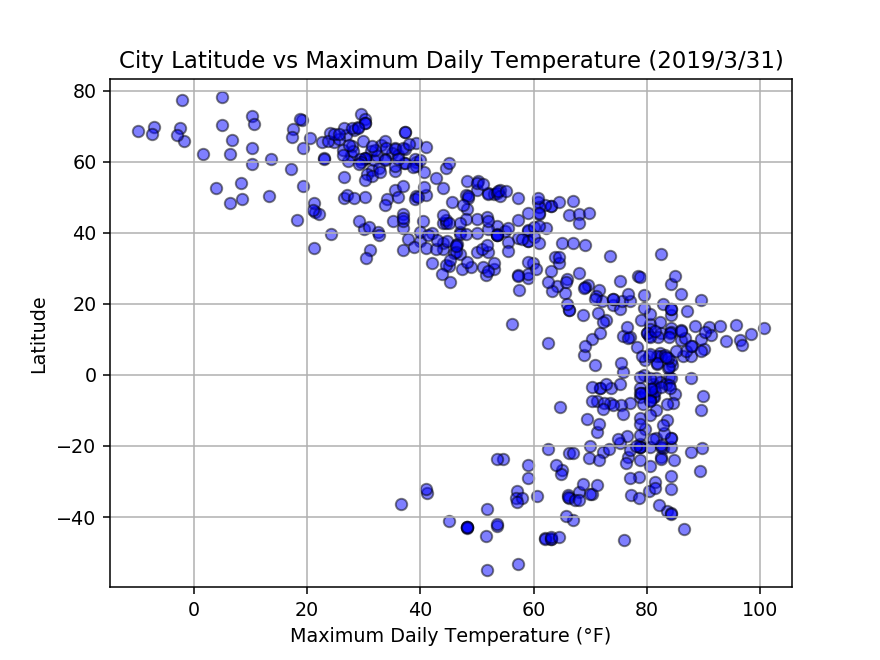

In [9]:
%matplotlib notebook
plt.title(f"City Latitude vs Maximum Daily Temperature ({dt[0]}/{dt[1]}/{dt[2]})")
plt.ylabel("Latitude")
plt.xlabel("Maximum Daily Temperature (°F)")

plt.grid()

plt.ylim(min(weather_data["Latitude"])-5, max(weather_data["Latitude"])+5)
plt.xlim(min(weather_data["Max Daily Temperature (°F)"])-5, max(weather_data["Max Daily Temperature (°F)"])+5)

plt.scatter(weather_data["Max Daily Temperature (°F)"], weather_data["Latitude"], 
            marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.savefig("output_data/temp_vs_latitude.png")
plt.show()

### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


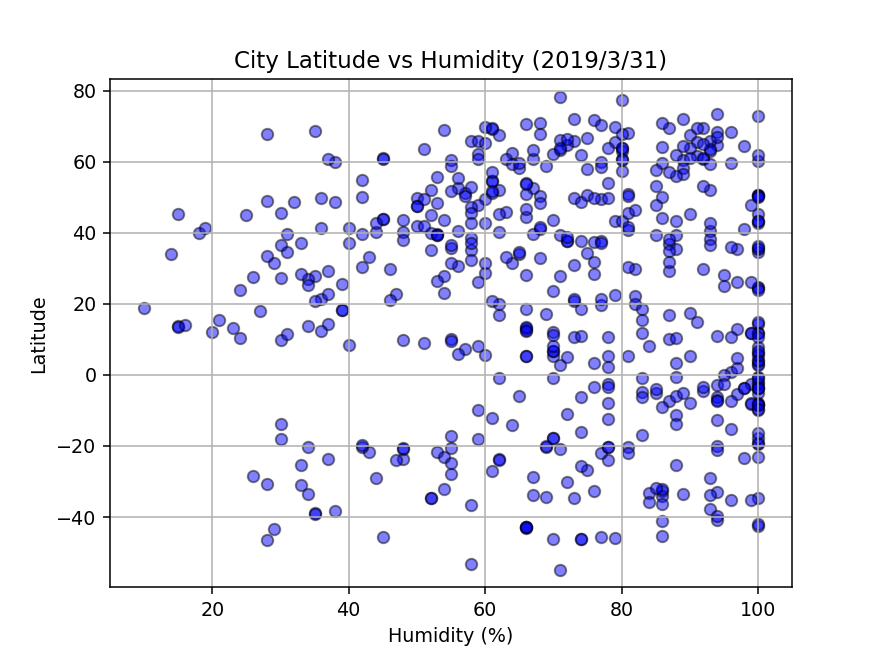

In [10]:
%matplotlib notebook
plt.title(f"City Latitude vs Humidity ({dt[0]}/{dt[1]}/{dt[2]})")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

plt.grid()

plt.ylim(min(weather_data["Latitude"])-5, max(weather_data["Latitude"])+5)
plt.xlim(min(weather_data["Humidity (%)"])-5, 105)

plt.scatter(weather_data["Humidity (%)"], weather_data["Latitude"], 
            marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.savefig("output_data/humidity_vs_latitude.png")
plt.show()

### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


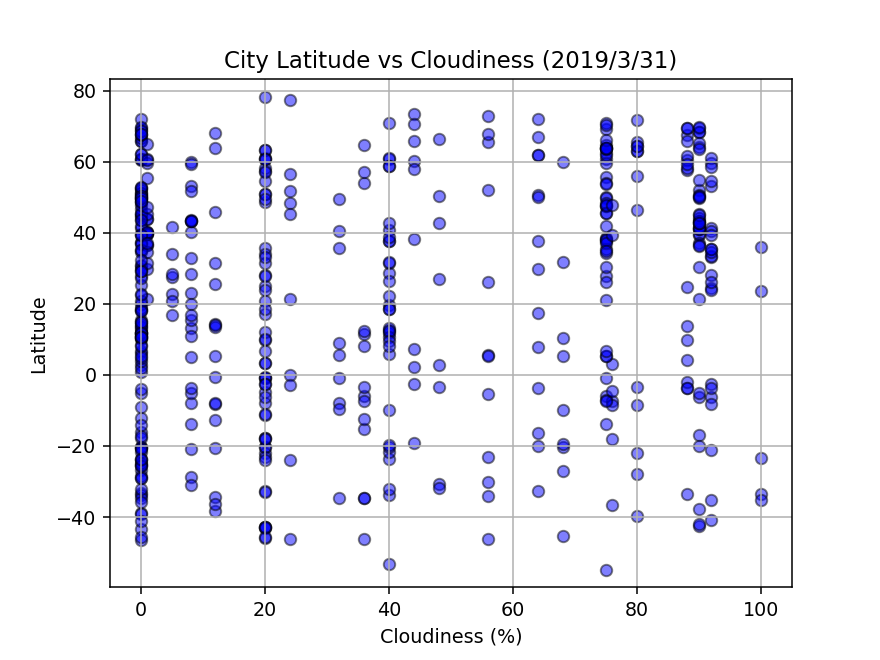

In [11]:
%matplotlib notebook
plt.title(f"City Latitude vs Cloudiness ({dt[0]}/{dt[1]}/{dt[2]})")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

plt.grid()

plt.ylim(min(weather_data["Latitude"])-5, max(weather_data["Latitude"])+5)
plt.xlim(min(weather_data["Cloudiness (%)"])-5, max(weather_data["Cloudiness (%)"])+5)

plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], 
            marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.savefig("output_data/cloudiness_vs_latitude.png")
plt.show()

In [12]:
weather_data["Cloudiness (%)"].unique()

array([ 68,  12,  90,  75,  88,   0,  40,  44,  36,  20,  80,  56,  64,
       100,   8,  76,  48,   5,  92,  24,   1,  32], dtype=int64)

### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


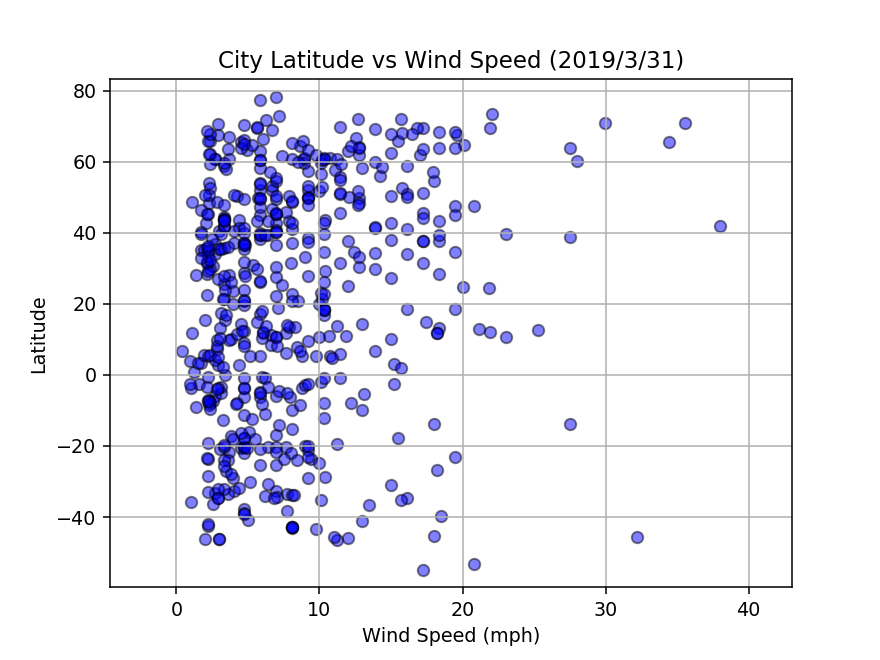

In [13]:
%matplotlib notebook
plt.title(f"City Latitude vs Wind Speed ({dt[0]}/{dt[1]}/{dt[2]})")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")

plt.grid()

plt.ylim(min(weather_data["Latitude"])-5, max(weather_data["Latitude"])+5)
plt.xlim(min(weather_data["Wind Speed (mph)"])-5, max(weather_data["Wind Speed (mph)"])+5)

plt.scatter(weather_data["Wind Speed (mph)"], weather_data["Latitude"],
            marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.savefig("output_data/wind_speed_vs_latitude.png")
plt.show()

***

### Some Observations
* The weather becomes warmer close to the Equator, with the maximum temperatures in a range of approximately ± 20°. The temperatures, however, tend to be lower in the Northern Hemisphere. The temperature difference between hemispheres could be explained due to the tilt of the Earth. It is therefore early Spring in the Northern Hemisphere and early Autumn in the Southern Hemisphere.
* There is no relationship between Latitude and Humidity. However, it is interesting that most of the cities tend to a higher humidity, and there are in fact very few with low humidity.
* There is also no discernible relationship between Latitude and Cloudiness. There are several cities with Cloudiness of 0, 75 and 90%. There are no elements to explain this observation. However, in the data set there are only 22 unique values. Therefore the measurement of Cloudiness can perhaps only be expressed in discrete values, therefore creating bands where several cities have similar Cloudiness.
* Even though there is not an observable relationship between Latitude and Windspeed, it is interesting to note that cities with windspeed > 20 mph are mostly located in the Northern Hemisphere.


***


### Extra Observations

Latitude is not the only factor influencing temperature, in fact Longitude has a strong effect as well. <br>
<br>
#### Some basic Meteorology:
Between the Tropics, wind currents usually run from West to East. On the other hand, north of the Tropic of Cancer and south of the Tropic of Capricorne (roughly), the wind current goes from East to West. <br>
Wind gets colder in the ocean, and warmer in land. That means that when a coast is located downwind from the ocean, it will be colder. The opposite is also true: a coast located downwind from inland will be warmer than a cost at the same latitude receiving wind from the ocean.<br>
<br>
This effect can actually be qualitatively observed in the last graph. Look at the cities at a latitude between 40° and 60°. This latitude corresponds roughly to North USA and Central and Northern Europe. In the figure it can be observed that cities in the American West Coast are colder than cities in Europe in the same Latitude. Similarly, cities in Europe in the same Latitude range are much warmer than cities in South Russia or North China (Latitude 40-60°). 


<IPython.core.display.Javascript object>


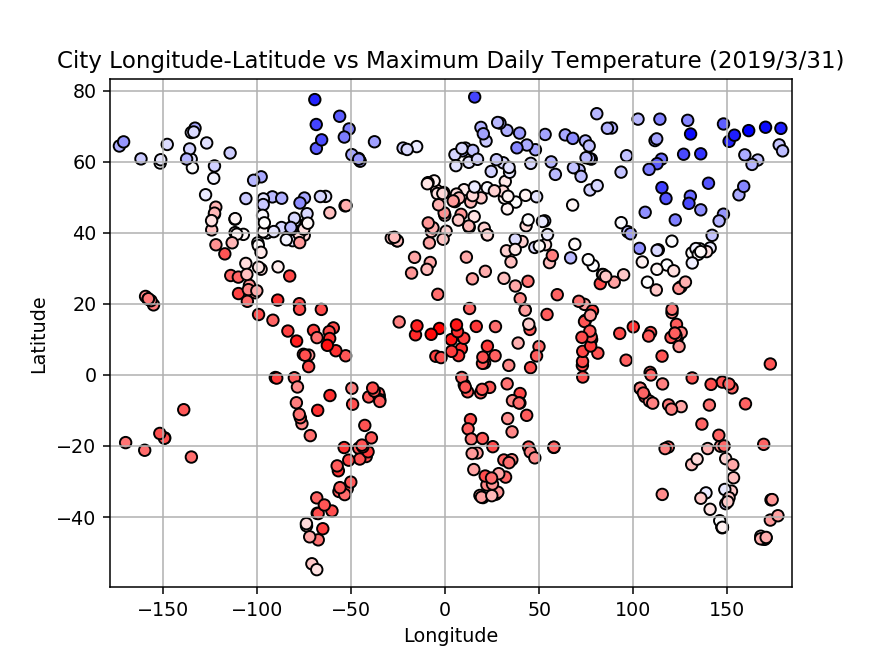

In [17]:
%matplotlib notebook
plt.title(f"City Longitude-Latitude vs Maximum Daily Temperature ({dt[0]}/{dt[1]}/{dt[2]})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.grid()

plt.xlim(min(weather_data["Longitude"])-5, max(weather_data["Longitude"])+5)
plt.ylim(min(weather_data["Latitude"])-5, max(weather_data["Latitude"])+5)

plt.scatter(weather_data["Longitude"], weather_data["Latitude"], 
            c=weather_data["Max Daily Temperature (°F)"], cmap=plt.cm.bwr, 
            marker="o", facecolors="blue", edgecolors="black")

plt.savefig("output_data/temp_vs_lon-lat.png")
plt.show()


&#9724;